In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pyodbc

In [2]:
# database connection
db_path = r"C:\Users\GILBERT FG\Desktop\Readings\PSP_database.accdb"

conn = pyodbc.connect(
    r"DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};"
    rf"DBQ={db_path};"
)

cursor = conn.cursor()

# Display database tables
for table in cursor.tables(tableType='TABLE'):
    print(table.table_name)

Block register
Plot monitoring history
Plot-block relation
PSPs
Slope correction factors
Thinning history
TreeData


In [3]:
# read tables into dataframe
# Queries
blk_register_query = r"SELECT * FROM [Block register] WHERE Plantation = 'Tain II'"
plt_hist_query = r"SELECT * FROM [Plot monitoring history] WHERE Plantations = 'Tain II' AND AreaType = 'Teak'"
plt_blk_query = r"SELECT * FROM [Plot-block relation] WHERE Plantations = 'Tain II' AND AreaType = 'Teak'"
tree_data_query = r"SELECT * FROM TreeData WHERE Plantations = 'Tain II' AND AreaType = 'Teak'"

# dataframes
blk_df = pd.read_sql(blk_register_query, conn)
plt_hist_df = pd.read_sql(plt_hist_query, conn)
plt_blk_df = pd.read_sql(plt_blk_query, conn)
df = pd.read_sql(tree_data_query, conn)

C:\Users\GILBERT FG\AppData\Local\Temp\ipykernel_2760\2914786339.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  blk_df = pd.read_sql(blk_register_query, conn)
C:\Users\GILBERT FG\AppData\Local\Temp\ipykernel_2760\2914786339.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  plt_hist_df = pd.read_sql(plt_hist_query, conn)
C:\Users\GILBERT FG\AppData\Local\Temp\ipykernel_2760\2914786339.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  plt_blk_df = pd.read_sql(plt_blk_query, conn)
C:\Users\GILBERT FG\AppData\Local\T

#### Merge Relevant Features for Analysis

##### Block Information

In [4]:
# overview of block dataframe
blk_df.head()

,PLANTATION,BLOCK,STATUS,ROTATION,OWNERSHIP,RESERVE,YEAR PLANTED,BLOCK AREA (ha),PRODUCTIVE,UNPRODUCTIVE,TEAK,NATURAL INDIGENOUS,PLANTED INDIGENOUS,GMELINA,OPEN LAND,ROCK,REMARK
0,Tain II,A17,PLANTED,1,FORM GHANA,TAIN II,2023,61.957130,58.858151,NaN,58.858151,NaN,NaN,NaN,NaN,3.098979,None
1,Tain II,A19,PLANTED,1,FORM GHANA,TAIN II,2019,67.587663,64.984407,0.15,64.984407,NaN,NaN,NaN,0.0,2.453256,None
2,Tain II,A20,PLANTED,1,FORM GHANA,TAIN II,2019,70.331435,70.197867,0.00,70.197867,NaN,NaN,NaN,0.0,0.133569,None
3,Tain II,A21,PLANTED,1,FORM GHANA,TAIN II,2019,48.657170,47.743954,0.40,47.743954,NaN,NaN,NaN,0.0,0.513216,None
4,Tain II,A22,PLANTED,1,FORM GHANA,TAIN II,2019,50.624752,50.110498,0.00,50.110498,NaN,NaN,NaN,0.0,0.514254,None


In [5]:
# extract relevant features
blk_df = blk_df[['PLANTATION', 'BLOCK', 'YEAR PLANTED', 'BLOCK AREA (ha)', 'PRODUCTIVE']]


In [6]:
# rename headers
blk_df = blk_df.rename(columns={'PLANTATION': 'plantations', 'BLOCK': 'block', 'YEAR PLANTED': 'year_planted', 'BLOCK AREA (ha)': 'block_size_ha', 'PRODUCTIVE': 'prod_area_ha'})

In [7]:
blk_df.head()

,plantations,block,year_planted,block_size_ha,prod_area_ha
0,Tain II,A17,2023,61.957130,58.858151
1,Tain II,A19,2019,67.587663,64.984407
2,Tain II,A20,2019,70.331435,70.197867
3,Tain II,A21,2019,48.657170,47.743954
4,Tain II,A22,2019,50.624752,50.110498


#### Plot History

In [8]:
plt_hist_df.head()

,MonitoringID,Plantations,Plot no,AreaType,Monitoring year,Monitoring Month,Monitoring day,Default plot size,Plot type,Monitoring team,Shrub cover (%),Herb cover (%),Invasive species cover (%),Erosion,Remarks,Excluded,Justification for exclusion,MDate
0,2154,Tain II,18,Teak,2018,1,22,729.0,Square,"Bentil, Ernest, Prince, Kwakye",NaN,NaN,None,False,None,False,None,2018-01-22
1,2155,Tain II,18,Teak,2019,1,24,729.0,Square,"Augustine,Enoch,Vida,Frank & Judith",NaN,NaN,None,False,None,False,None,2019-01-24
2,2156,Tain II,19,Teak,2018,2,13,729.0,Square,"Prince, Philp, Kwakye, Bentil, Danquah",NaN,NaN,None,False,None,False,None,2018-02-13
3,2157,Tain II,19,Teak,2019,1,23,729.0,Square,"Belinda,Kingsley,Prince,Stephen & Juliet",NaN,NaN,None,False,None,False,None,2019-01-23
4,2158,Tain II,20,Teak,2018,2,13,729.0,Square,"Prince, Philp, Kwakye, Bentil, Danquah",NaN,NaN,None,False,None,False,None,2018-02-13


In [9]:
plt_hist_df = plt_hist_df[['Plantations', 'Plot no', 'Monitoring year', 'Default plot size']]

In [10]:
plt_hist_df = plt_hist_df.rename(columns={'Plantations': 'plantations', 'Plot no': 'plot_id', 'Monitoring year': 'measurement_year', 'Default plot size': 'plot_size_m2'})

In [11]:
plt_hist_df.head()

,plantations,plot_id,measurement_year,plot_size_m2
0,Tain II,18,2018,729.0
1,Tain II,18,2019,729.0
2,Tain II,19,2018,729.0
3,Tain II,19,2019,729.0
4,Tain II,20,2018,729.0


##### Plot-Block Relation

In [12]:
plt_blk_df.head()

,RelationID,Plantations,Plot no,AreaType,Deviating plant year,Block,Start date,End date
0,74,Tain II,1370,Teak,NaN,PF80,2020-05-01,9999-12-31 00:00:00
1,76,Tain II,1372,Teak,NaN,C17,2020-05-01,9999-12-31 00:00:00
2,77,Tain II,1366,Teak,NaN,C17,2020-05-01,9999-12-31 00:00:00
3,78,Tain II,1363,Teak,NaN,C17,2020-05-01,9999-12-31 00:00:00
4,79,Tain II,1374,Teak,NaN,C17,2020-05-01,9999-12-31 00:00:00


In [13]:
plt_blk_df = plt_blk_df[['Plantations', 'Plot no', 'AreaType', 'Block']]

In [14]:
plt_blk_df.head()

,Plantations,Plot no,AreaType,Block
0,Tain II,1370,Teak,PF80
1,Tain II,1372,Teak,C17
2,Tain II,1366,Teak,C17
3,Tain II,1363,Teak,C17
4,Tain II,1374,Teak,C17


In [15]:
plt_blk_df = plt_blk_df.rename(columns={'Plantations': 'plantations', 'Plot no': 'plot_id', 'AreaType': 'area_type', 'Block': 'block'})

In [16]:
plt_blk_df.head()

,plantations,plot_id,area_type,block
0,Tain II,1370,Teak,PF80
1,Tain II,1372,Teak,C17
2,Tain II,1366,Teak,C17
3,Tain II,1363,Teak,C17
4,Tain II,1374,Teak,C17


##### Tree Data

In [17]:
df.head()

,Plantations,AreaType,Monitoring year,Monitoring month,Monitoring day,PLOT,TREE NR,Tree SPECIES,Species scientific name,H (m),DBH (cm),Merchantable height (m),REMARKS,Incorrect DBH,Incorrect H,Incorrect H / DBH,Exclude,Justification for exclusion
0,Tain II,Teak,2018.0,1.0,13,1,71.0,Teak,Tectona grandis,7.25,12.0,None,Fire scars,False,False,None,False,None
1,Tain II,Teak,2018.0,1.0,13,1,76.0,Teak,Tectona grandis,8.25,12.0,None,Fire scars,False,False,None,False,None
2,Tain II,Teak,2018.0,1.0,13,1,68.0,Teak,Tectona grandis,7.00,11.8,None,Fire scars,False,False,None,False,None
3,Tain II,Teak,2018.0,1.0,13,1,53.0,Teak,Tectona grandis,7.25,11.5,None,Fire scars,False,False,None,False,None
4,Tain II,Teak,2018.0,1.0,13,1,58.0,Teak,Tectona grandis,7.00,10.5,None,Fire scars,False,False,None,False,None


In [18]:
df = df[['Plantations', 'AreaType', 'Monitoring year', 'PLOT', 'TREE NR', 'H (m)', 'DBH (cm)', 'REMARKS']]

In [19]:
df.head()

,Plantations,AreaType,Monitoring year,PLOT,TREE NR,H (m),DBH (cm),REMARKS
0,Tain II,Teak,2018.0,1,71.0,7.25,12.0,Fire scars
1,Tain II,Teak,2018.0,1,76.0,8.25,12.0,Fire scars
2,Tain II,Teak,2018.0,1,68.0,7.00,11.8,Fire scars
3,Tain II,Teak,2018.0,1,53.0,7.25,11.5,Fire scars
4,Tain II,Teak,2018.0,1,58.0,7.00,10.5,Fire scars


In [20]:
df = df.rename(columns={'Plantations': 'plantations', 'AreaType': 'area_type', 'Monitoring year': 'measurement_year', 'PLOT': 'plot_id', 'TREE NR': 'tree_id', 'H (m)': 'height_m', 'DBH (cm)': 'dbh_cm', 'REMARKS': 'remarks'})

In [21]:
df.head()

,plantations,area_type,measurement_year,plot_id,tree_id,height_m,dbh_cm,remarks
0,Tain II,Teak,2018.0,1,71.0,7.25,12.0,Fire scars
1,Tain II,Teak,2018.0,1,76.0,8.25,12.0,Fire scars
2,Tain II,Teak,2018.0,1,68.0,7.00,11.8,Fire scars
3,Tain II,Teak,2018.0,1,53.0,7.25,11.5,Fire scars
4,Tain II,Teak,2018.0,1,58.0,7.00,10.5,Fire scars


In [22]:
# Merge all the dataframes into one dataframe
plt_blk_df = plt_blk_df[['plot_id', 'block']]

plt_blk_df.head()

,plot_id,block
0,1370,PF80
1,1372,C17
2,1366,C17
3,1363,C17
4,1374,C17


In [23]:
df = df.merge(plt_blk_df, on='plot_id')
df.head()

,plantations,area_type,measurement_year,plot_id,tree_id,height_m,dbh_cm,remarks,block
0,Tain II,Teak,2018.0,1,71.0,7.25,12.0,Fire scars,B39
1,Tain II,Teak,2018.0,1,76.0,8.25,12.0,Fire scars,B39
2,Tain II,Teak,2018.0,1,68.0,7.00,11.8,Fire scars,B39
3,Tain II,Teak,2018.0,1,53.0,7.25,11.5,Fire scars,B39
4,Tain II,Teak,2018.0,1,58.0,7.00,10.5,Fire scars,B39


In [24]:
plt_hist_df = plt_hist_df[['plot_id', 'plot_size_m2']]
plt_hist_df.head()

,plot_id,plot_size_m2
0,18,729.0
1,18,729.0
2,19,729.0
3,19,729.0
4,20,729.0


In [25]:
df = df.merge(plt_hist_df, on='plot_id')
df.head()

,plantations,area_type,measurement_year,plot_id,tree_id,height_m,dbh_cm,remarks,block,plot_size_m2
0,Tain II,Teak,2018.0,1,71.0,7.25,12.0,Fire scars,B39,729.0
1,Tain II,Teak,2018.0,1,71.0,7.25,12.0,Fire scars,B39,729.0
2,Tain II,Teak,2018.0,1,71.0,7.25,12.0,Fire scars,B39,729.0
3,Tain II,Teak,2018.0,1,71.0,7.25,12.0,Fire scars,B39,729.0
4,Tain II,Teak,2018.0,1,71.0,7.25,12.0,Fire scars,B39,729.0


In [26]:
blk_df = blk_df[['block', 'year_planted', 'block_size_ha', 'prod_area_ha']]
blk_df.head()

,block,year_planted,block_size_ha,prod_area_ha
0,A17,2023,61.957130,58.858151
1,A19,2019,67.587663,64.984407
2,A20,2019,70.331435,70.197867
3,A21,2019,48.657170,47.743954
4,A22,2019,50.624752,50.110498


In [27]:
df = df.merge(blk_df, on='block')
df.head()

,plantations,area_type,measurement_year,plot_id,tree_id,height_m,dbh_cm,remarks,block,plot_size_m2,year_planted,block_size_ha,prod_area_ha
0,Tain II,Teak,2018.0,1,71.0,7.25,12.0,Fire scars,B39,729.0,2013,63.327094,61.114539
1,Tain II,Teak,2018.0,1,71.0,7.25,12.0,Fire scars,B39,729.0,2013,63.327094,61.114539
2,Tain II,Teak,2018.0,1,71.0,7.25,12.0,Fire scars,B39,729.0,2013,63.327094,61.114539
3,Tain II,Teak,2018.0,1,71.0,7.25,12.0,Fire scars,B39,729.0,2013,63.327094,61.114539
4,Tain II,Teak,2018.0,1,71.0,7.25,12.0,Fire scars,B39,729.0,2013,63.327094,61.114539


In [28]:
# Re-arrange the columns
df = df[['plantations', 'area_type', 'measurement_year', 'block', 'year_planted','block_size_ha', 'prod_area_ha','plot_id', 'plot_size_m2', 'tree_id', 'height_m', 'dbh_cm', 'remarks']]

In [29]:
df.head()

,plantations,area_type,measurement_year,block,year_planted,block_size_ha,prod_area_ha,plot_id,plot_size_m2,tree_id,height_m,dbh_cm,remarks
0,Tain II,Teak,2018.0,B39,2013,63.327094,61.114539,1,729.0,71.0,7.25,12.0,Fire scars
1,Tain II,Teak,2018.0,B39,2013,63.327094,61.114539,1,729.0,71.0,7.25,12.0,Fire scars
2,Tain II,Teak,2018.0,B39,2013,63.327094,61.114539,1,729.0,71.0,7.25,12.0,Fire scars
3,Tain II,Teak,2018.0,B39,2013,63.327094,61.114539,1,729.0,71.0,7.25,12.0,Fire scars
4,Tain II,Teak,2018.0,B39,2013,63.327094,61.114539,1,729.0,71.0,7.25,12.0,Fire scars


### CLEANING THE DATA

In [30]:
# check for null values
df.isna().sum()


plantations              0
area_type                0
measurement_year         0
block                    0
year_planted             0
block_size_ha            0
prod_area_ha             0
plot_id                  0
plot_size_m2             0
tree_id                  0
height_m               223
dbh_cm                 243
remarks             580962
dtype: int64

In [31]:
df = df.dropna(subset=['height_m', 'dbh_cm'])

In [32]:
df.isna().sum()

plantations              0
area_type                0
measurement_year         0
block                    0
year_planted             0
block_size_ha            0
prod_area_ha             0
plot_id                  0
plot_size_m2             0
tree_id                  0
height_m                 0
dbh_cm                   0
remarks             580921
dtype: int64

In [33]:
df['remarks'].unique()

array(['Fire scars', None, 'Beetle infestation', 'Top broken',
       'Top Broken', 'Climber on top', 'Beetle', 'Bent', 'Dieback',
       'climber', 'forked', 'bent', '', 'marked', 'Top Broken, Marked',
       'under a tree', 'Climber', 'Forked', 'tall', 'fork', 'short',
       'Abnormal tree, correct measurement', 'Under tree', 'crooked', ' ',
       'Half dead', 'Under a tree', 'TOP BROKEN', 'Marked',
       'Abnormal tree', 'Crooked'], dtype=object)

In [34]:
# remove trees with defects
df = df[~((df['remarks'] == 'Beetle infestation')  | (df['remarks'] == 'Beetle') | (df['remarks'] == 'Dieback') | (df['remarks'] == 'Bent'))]


In [35]:
df['remarks'].unique()

array(['Fire scars', None, 'Top broken', 'Top Broken', 'Climber on top',
       'climber', 'forked', 'bent', '', 'marked', 'Top Broken, Marked',
       'under a tree', 'Climber', 'Forked', 'tall', 'fork', 'short',
       'Abnormal tree, correct measurement', 'Under tree', 'crooked', ' ',
       'Half dead', 'Under a tree', 'TOP BROKEN', 'Marked',
       'Abnormal tree', 'Crooked'], dtype=object)

In [36]:
df = df[~((df['remarks'] == 'bent') | (df['remarks'] == 'Abnormal tree') | (df['remarks'] == 'Abnormal tree, correct measurement') | (df['remarks'] == 'Forked'))]

In [37]:
df['remarks'].unique()

array(['Fire scars', None, 'Top broken', 'Top Broken', 'Climber on top',
       'climber', 'forked', '', 'marked', 'Top Broken, Marked',
       'under a tree', 'Climber', 'tall', 'fork', 'short', 'Under tree',
       'crooked', ' ', 'Half dead', 'Under a tree', 'TOP BROKEN',
       'Marked', 'Crooked'], dtype=object)

In [38]:
df = df[~((df['remarks'] == 'forked') | (df['remarks'] == 'fork') | (df['remarks'] == 'crooked')  | (df['remarks'] == 'Half dead') | (df['remarks'] == 'Crooked'))]

In [39]:
df['remarks'].unique()

array(['Fire scars', None, 'Top broken', 'Top Broken', 'Climber on top',
       'climber', '', 'marked', 'Top Broken, Marked', 'under a tree',
       'Climber', 'tall', 'short', 'Under tree', ' ', 'Under a tree',
       'TOP BROKEN', 'Marked'], dtype=object)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 854233 entries, 0 to 857133
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   plantations       854233 non-null  object 
 1   area_type         854233 non-null  object 
 2   measurement_year  854233 non-null  float64
 3   block             854233 non-null  object 
 4   year_planted      854233 non-null  int64  
 5   block_size_ha     854233 non-null  float64
 6   prod_area_ha      854233 non-null  float64
 7   plot_id           854233 non-null  object 
 8   plot_size_m2      854233 non-null  float64
 9   tree_id           854233 non-null  float64
 10  height_m          854233 non-null  float64
 11  dbh_cm            854233 non-null  float64
 12  remarks           273312 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 91.2+ MB


### Basal Area in squared meters

In [41]:
df['basal_area_m2'] = (np.pi * (df['dbh_cm'] / 200)**2)

In [42]:
df.head()

,plantations,area_type,measurement_year,block,year_planted,block_size_ha,prod_area_ha,plot_id,plot_size_m2,tree_id,height_m,dbh_cm,remarks,basal_area_m2
0,Tain II,Teak,2018.0,B39,2013,63.327094,61.114539,1,729.0,71.0,7.25,12.0,Fire scars,0.01131
1,Tain II,Teak,2018.0,B39,2013,63.327094,61.114539,1,729.0,71.0,7.25,12.0,Fire scars,0.01131
2,Tain II,Teak,2018.0,B39,2013,63.327094,61.114539,1,729.0,71.0,7.25,12.0,Fire scars,0.01131
3,Tain II,Teak,2018.0,B39,2013,63.327094,61.114539,1,729.0,71.0,7.25,12.0,Fire scars,0.01131
4,Tain II,Teak,2018.0,B39,2013,63.327094,61.114539,1,729.0,71.0,7.25,12.0,Fire scars,0.01131


#### Basal Area per Hectare

In [43]:
ba_ha = df.groupby(['plot_id', 'plot_size_m2'])['basal_area_m2'].sum().reset_index(name="basal_area_sum")
ba_ha.head()

,plot_id,plot_size_m2,basal_area_sum
0,1,729.0,23.829096
1,10,729.0,34.627892
2,100,729.0,12.272892
3,101,729.0,10.996111
4,102,729.0,9.247781


In [44]:
# compute basal area per hectare
ba_ha['basal_area_ha'] = ba_ha['basal_area_sum'] / (ba_ha['plot_size_m2'] / 10000)
ba_ha.head()

,plot_id,plot_size_m2,basal_area_sum,basal_area_ha
0,1,729.0,23.829096,326.873747
1,10,729.0,34.627892,475.005383
2,100,729.0,12.272892,168.352434
3,101,729.0,10.996111,150.838292
4,102,729.0,9.247781,126.855701


#### Volume computation

In [64]:
df['volume'] = df['basal_area_m2'] * df['height_m'] * (np.pi/40000)
df.head()

,plantations,area_type,measurement_year,block,year_planted,block_size_ha,prod_area_ha,plot_id,plot_size_m2,tree_id,height_m,dbh_cm,remarks,basal_area_m2,volume,age
0,Tain II,Teak,2018.0,B39,2013,63.327094,61.114539,1,729.0,71.0,7.25,12.0,Fire scars,0.01131,0.000006,5.0
1,Tain II,Teak,2018.0,B39,2013,63.327094,61.114539,1,729.0,71.0,7.25,12.0,Fire scars,0.01131,0.000006,5.0
2,Tain II,Teak,2018.0,B39,2013,63.327094,61.114539,1,729.0,71.0,7.25,12.0,Fire scars,0.01131,0.000006,5.0
3,Tain II,Teak,2018.0,B39,2013,63.327094,61.114539,1,729.0,71.0,7.25,12.0,Fire scars,0.01131,0.000006,5.0
4,Tain II,Teak,2018.0,B39,2013,63.327094,61.114539,1,729.0,71.0,7.25,12.0,Fire scars,0.01131,0.000006,5.0


## Growth Over Time

#### Average Basal Area Per Hectare Over Time

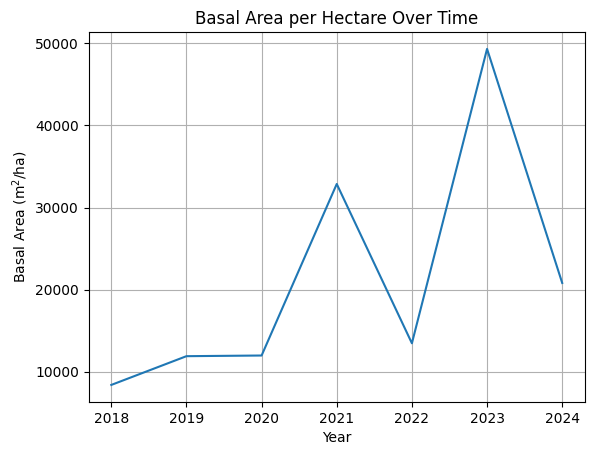

In [65]:
annual_ba = df.groupby('measurement_year')['basal_area_m2'].sum() / (df['plot_size_m2'] / 10000)
annual_ba.plot(kind='line', title='Basal Area per Hectare Over Time')
plt.ylabel("Basal Area (m$^2$/ha)")
plt.xlabel('Year')
plt.grid(True)
plt.show()

#### Average DBH Over Time

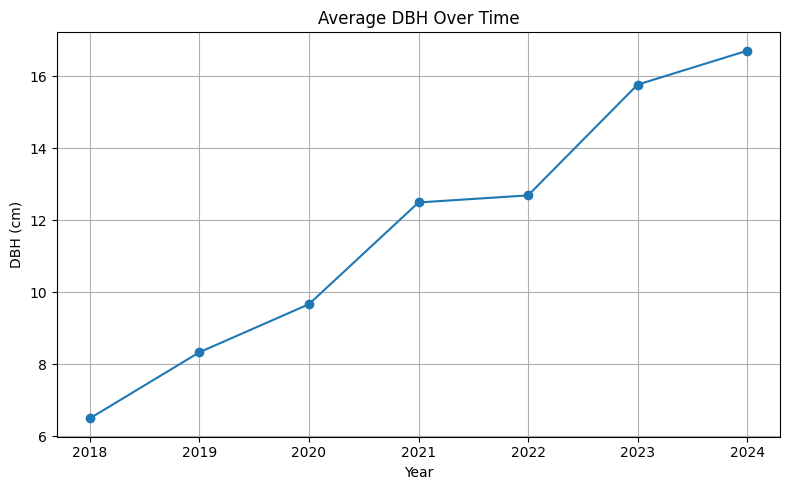

In [66]:
dbh_trend = df.groupby('measurement_year')['dbh_cm'].mean()

plt.figure(figsize=(8, 5))
dbh_trend.plot(marker='o')
plt.title("Average DBH Over Time")
plt.ylabel('DBH (cm)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Average Volume Per Hectare Over Time

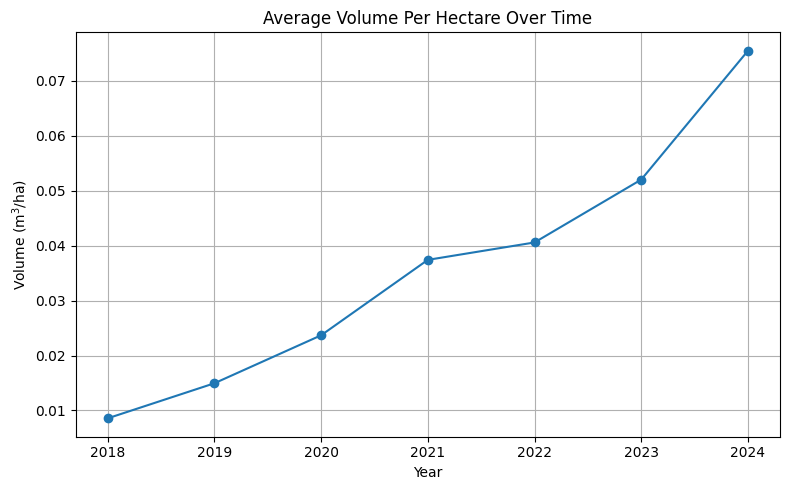

In [67]:
vol_per_ha = df.groupby(['measurement_year', 'plot_id'])['volume'].sum().unstack().mean(axis=1) / (df['plot_size_m2'] / 10000)

plt.figure(figsize=(8, 5))
vol_per_ha.plot(marker='o')
plt.title('Average Volume Per Hectare Over Time')
plt.ylabel('Volume (m$^3$/ha)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Number of Trees per Hectare (Density) Over Time

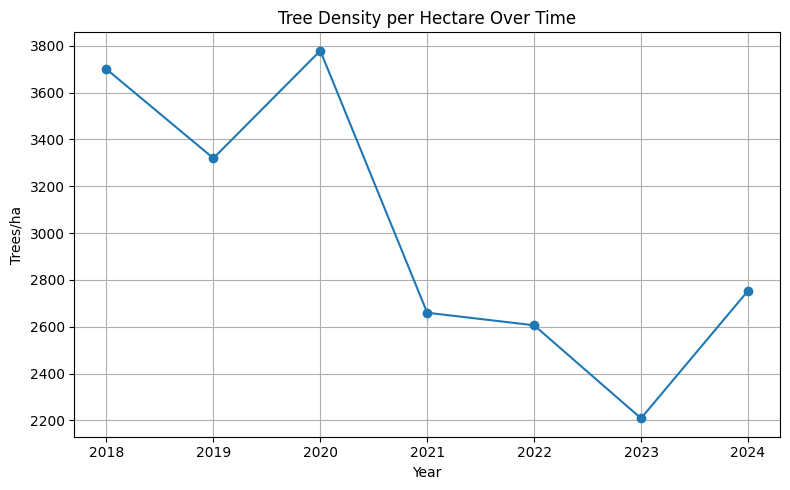

In [68]:
tree_count = df.groupby(['measurement_year', 'plot_id'])['tree_id'].count().unstack().mean(axis=1)
trees_per_ha = tree_count / (df['plot_size_m2'] / 10000)

plt.figure(figsize=(8, 5))
trees_per_ha.plot(marker='o')
plt.title("Tree Density per Hectare Over Time")
plt.ylabel('Trees/ha')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
df['age'] = df['measurement_year'] - df['year_planted']
df.head()

,plantations,area_type,measurement_year,block,year_planted,block_size_ha,prod_area_ha,plot_id,plot_size_m2,tree_id,height_m,dbh_cm,remarks,basal_area_m2,volume,age
0,Tain II,Teak,2018.0,B39,2013,63.327094,61.114539,1,729.0,71.0,7.25,12.0,Fire scars,0.01131,0.000006,5.0
1,Tain II,Teak,2018.0,B39,2013,63.327094,61.114539,1,729.0,71.0,7.25,12.0,Fire scars,0.01131,0.000006,5.0
2,Tain II,Teak,2018.0,B39,2013,63.327094,61.114539,1,729.0,71.0,7.25,12.0,Fire scars,0.01131,0.000006,5.0
3,Tain II,Teak,2018.0,B39,2013,63.327094,61.114539,1,729.0,71.0,7.25,12.0,Fire scars,0.01131,0.000006,5.0
4,Tain II,Teak,2018.0,B39,2013,63.327094,61.114539,1,729.0,71.0,7.25,12.0,Fire scars,0.01131,0.000006,5.0


#### Average MAI Over Time

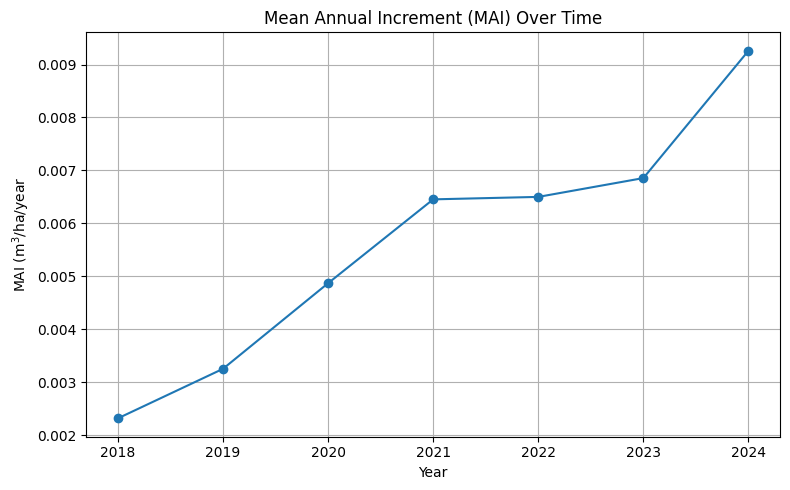

In [55]:
# mean age
mean_age = df.groupby('measurement_year')['age'].mean()

# compute MAI
mai = vol_per_ha / mean_age

plt.figure(figsize=(8, 5))
mai.plot(marker='o')
plt.title('Mean Annual Increment (MAI) Over Time')
plt.xlabel('Year')
plt.ylabel('MAI (m$^3$/ha/year')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Volume-MAI Over Time

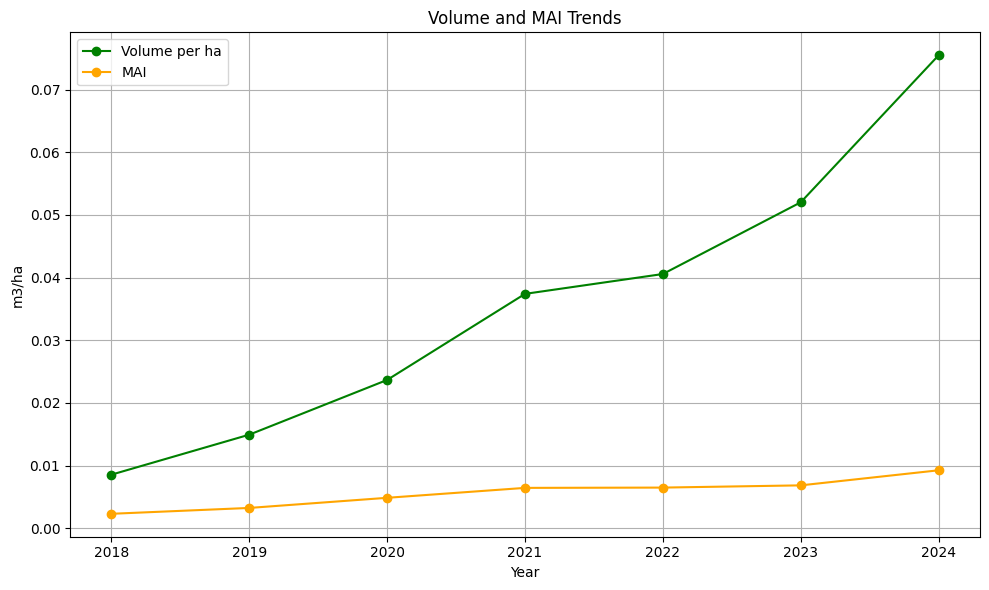

In [52]:
plt.figure(figsize=(10, 6))
vol_per_ha.plot(marker='o', label='Volume per ha', color='green')
mai.plot(marker='o', label='MAI', color='orange')
plt.title("Volume and MAI Trends")
plt.xlabel("Year")
plt.ylabel("m3/ha")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Export to Excel

In [53]:

# Combine all into one Dataframe
summary_df = pd.DataFrame({
    'Volume_per_ha': vol_per_ha,
    'Mean_Age': mean_age,
    'MAI': mai
})

In [54]:
excel_file = 'growth_analysis_report.xlsx'
with pd.ExcelWriter(excel_file, engine='xlsxwriter') as writer:
    df.to_excel(writer, sheet_name='Cleaned Data', index=False)
    summary_df.to_excel(writer, sheet_name='Summary', index=False)